# Brain Tumor Detection using Deep Learning

This notebook implements a CNN model to detect brain tumors from [MRI scans](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection).

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

In [5]:
def load_data(data_dir, img_size=(150, 150)):
    images = []
    labels = []

    # Load positive examples (with tumor)
    yes_path = os.path.join(data_dir, 'yes')
    for img_name in os.listdir(yes_path):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(yes_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(1)

    # Load negative examples (without tumor)
    no_path = os.path.join(data_dir, 'no')
    for img_name in os.listdir(no_path):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(no_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(0)

    return np.array(images), np.array(labels)

# Load the dataset
data_dir = 'data/brain_tumor_dataset'
X, y = load_data(data_dir)

# Normalize pixel values
X = X.astype('float32') / 255.0

# Split the data ensuring 10 images from each class for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=20, stratify=y, random_state=42
)

print(f'Training samples: {len(X_train)}')
print(f'Testing samples: {len(X_test)}')

Training samples: 233
Testing samples: 20


## Model Creation

In [6]:
def create_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create and compile the model
model = create_model((150, 150, 3))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.6495 - loss: 0.6368 - val_accuracy: 0.8085 - val_loss: 0.4823
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7242 - loss: 0.5827 - val_accuracy: 0.7660 - val_loss: 0.5876
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.7712 - loss: 0.5224 - val_accuracy: 0.8298 - val_loss: 0.4826
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7425 - loss: 0.4881 - val_accuracy: 0.8298 - val_loss: 0.4973
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7964 - loss: 0.4368 - val_accuracy: 0.8298 - val_loss: 0.4897
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8123 - loss: 0.4313 - val_accuracy: 0.8298 - val_loss: 0.4894
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.8539 - loss: 0.3563 - val_accuracy: 0.8511 - val_loss: 0.5116
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8716 - loss: 0.2905 - val_accuracy: 0.8511 - val_loss:

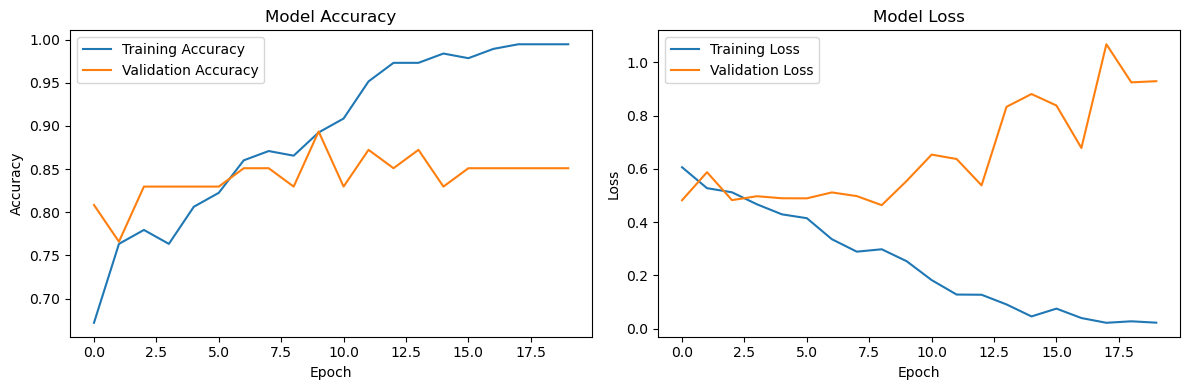

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

Test accuracy: 0.8000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


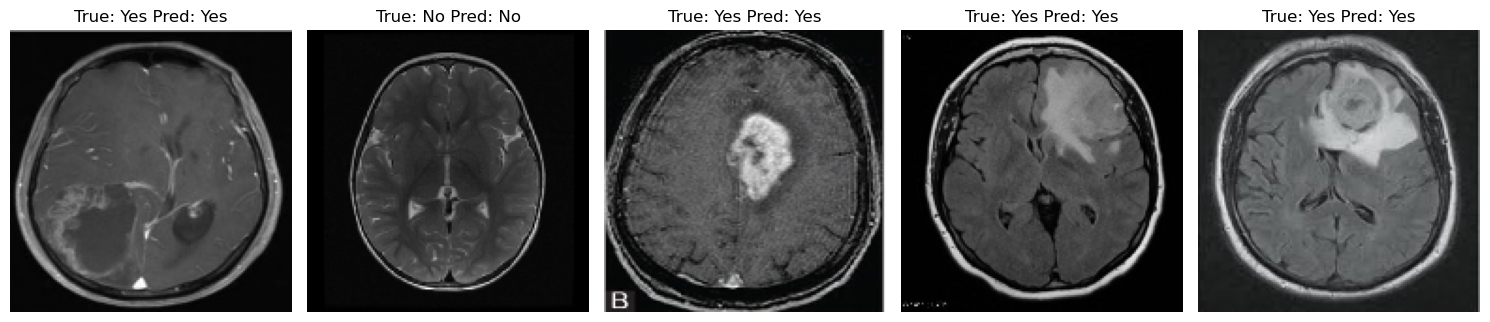

In [9]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Display some test predictions
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f'True: {"Yes" if y_test[i] == 1 else "No"} Pred: {"Yes" if y_pred_classes[i] == 1 else "No"}')
    plt.axis('off')
plt.tight_layout()
plt.show()
